# Ensemble in Central: variables (over/under sea-ice)

## Imports & defaults

In [1]:
import os

os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import libs.ensemble
import libs.local
import libs.plot
import libs.vars
import matplotlib
import numpy as np
import warnings

matplotlib.rcParams.update({ 'font.size': 18 })
warnings.filterwarnings('ignore')

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## Data

In [3]:
# ----- SPECIFIC SETTINGS -----
component = 'Amon'
experiment = 'ssp585'
variable_id = 'prra_siconc'

conf = [v for v in libs.vars.variables() if v['variable_id'] == variable_id][0]
time_series_text = 'precipitation, rainfall (dashed), and snowfall (dotted) over sea-ice'
time_series_weighted_method = conf['weighting_method']
time_series_units = conf['units']
time_series_y_label = '' #f'Precipitation ({time_series_units})'
time_series_y_range = (0, 1.5)
time_series_y_range_monthly = (0, 2)
time_series_y_range_regional = (0, 3)
time_series_process = lambda x: x

In [4]:
region = 'Central'
suffix = ''
settings = {
    'region': region,
    'suffix': suffix
}

ensemble_prra_time_series = libs.local.get_ensemble_series(variable_id, experiment, **settings)
ensemble_pr_time_series = libs.local.get_ensemble_series('pr_siconc', experiment, **settings)
ensemble_prsn_time_series = libs.local.get_ensemble_series('prsn_siconc', experiment, **settings)

# per month
ensemble_pr_time_series *= 30
ensemble_prra_time_series *= 30
ensemble_prsn_time_series *= 30

ensemble_tas_time_series = libs.local.get_ensemble_series('tas_siconc', experiment, **settings)
ensemble_tos_time_series = libs.local.get_ensemble_series('tos_siconc', experiment, **settings)

ensemble_siconc_time_series = libs.local.get_ensemble_series('siconc', experiment, **settings)
ensemble_siconc_time_series /= 2e5

ensemble_sithick_time_series = libs.local.get_ensemble_series('sithick', experiment, **settings)
ensemble_sithick_time_series *= 10

ensemble_sisnthick_time_series = libs.local.get_ensemble_series('sisnthick', experiment, **settings)
ensemble_sisnthick_time_series *= 100

ensemble_simp_time_series = libs.local.get_ensemble_series('simpconc', experiment, **settings)
#ensemble_simp_time_series /= 1e5

# ensemble_simass_time_series = time_series_process(
#     libs.local.get_ensemble_series('simass', experiment)
# )

for variable in ensemble_tas_time_series:
    ensemble_siconc_time_series[variable].attrs['plot_kwargs'] = { 'linestyle': 'dashdot' }
    ensemble_sithick_time_series[variable].attrs['plot_kwargs'] = { 'linestyle': 'dashdot' }
    ensemble_sisnthick_time_series[variable].attrs['plot_kwargs'] = { 'linestyle': 'dashdot' }
    if variable in ensemble_simp_time_series:
        ensemble_simp_time_series[variable].attrs['plot_kwargs'] = { 'linestyle': 'dashdot' }


time_slices = libs.vars.default_time_slices()

## Monthly variability

### Full region (time)

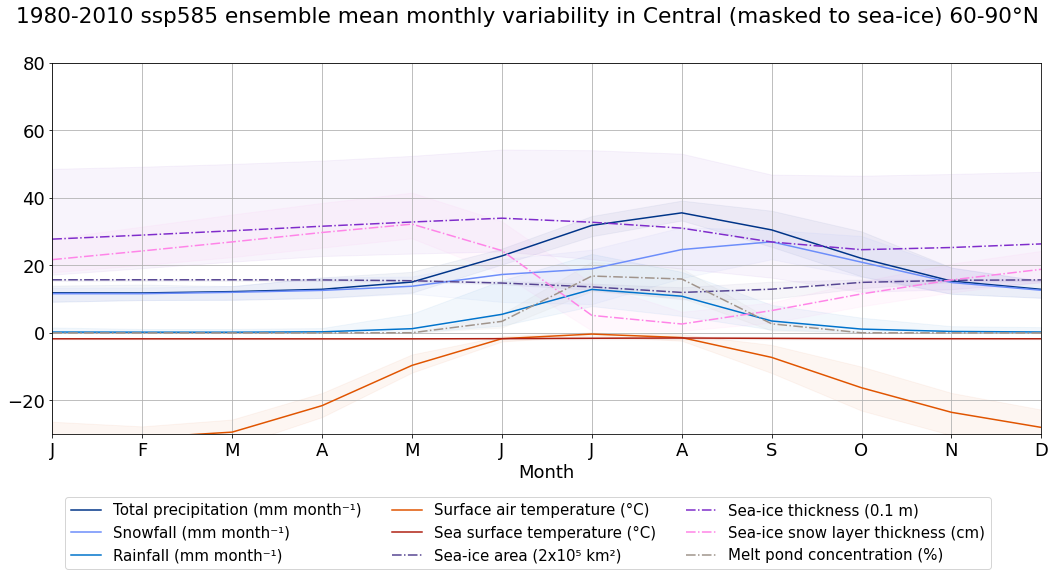

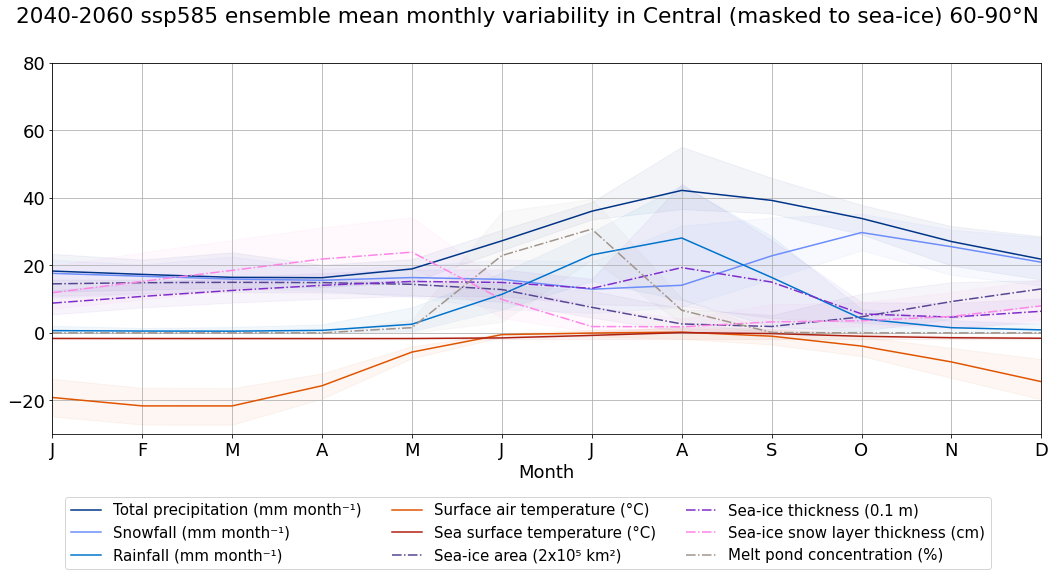

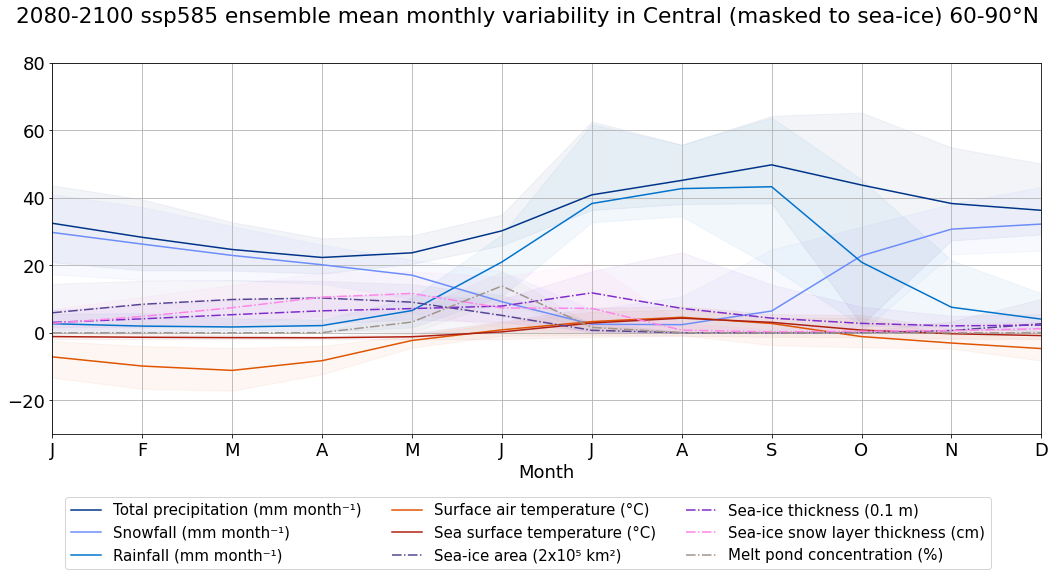

In [5]:
import numpy as np

for s in time_slices:
    s_label = s['label']
    
    slice_pr = ensemble_pr_time_series.sel(**s['slice']).groupby('time.month').mean('time')
    slice_pr['Ensemble mean'].attrs['label'] = 'Total precipitation (mm month⁻¹)'
    slice_pr['Ensemble mean'].attrs['color'] = '#003488'
    
    slice_prsn = ensemble_prsn_time_series.sel(**s['slice']).groupby('time.month').mean('time')
    slice_prsn['Ensemble mean'].attrs['label'] = 'Snowfall (mm month⁻¹)'
    slice_prsn['Ensemble mean'].attrs['color'] = '#6c8dfa'
    
    slice_prra = ensemble_prra_time_series.sel(**s['slice']).groupby('time.month').mean('time')
    slice_prra['Ensemble mean'].attrs['label'] = 'Rainfall (mm month⁻¹)'
    slice_prra['Ensemble mean'].attrs['color'] = '#0073cc'
    
    slice_tas = ensemble_tas_time_series.sel(**s['slice']).groupby('time.month').mean('time')
    slice_tas['Ensemble mean'].attrs['label'] = 'Surface air temperature (°C)'
    slice_tas['Ensemble mean'].attrs['color'] = '#e05400'
    
    slice_tos = ensemble_tos_time_series.sel(**s['slice']).groupby('time.month').mean('time')
    slice_tos['Ensemble mean'].attrs['label'] = 'Sea surface temperature (°C)'
    slice_tos['Ensemble mean'].attrs['color'] = '#ae2012'
    
    slice_siconc = ensemble_siconc_time_series.sel(**s['slice']).groupby('time.month').mean('time')
    slice_siconc['Ensemble mean'].attrs['label'] = 'Sea-ice area (2x10⁵ km²)'
    slice_siconc['Ensemble mean'].attrs['color'] = '#564592'
    
    slice_sithick = ensemble_sithick_time_series.sel(**s['slice']).groupby('time.month').mean('time')
    slice_sithick['Ensemble mean'].attrs['label'] = 'Sea-ice thickness (0.1 m)'
    slice_sithick['Ensemble mean'].attrs['color'] = '#7f2ccb'
    
    slice_sisnthick = ensemble_sisnthick_time_series.sel(**s['slice']).groupby('time.month').mean('time')
    slice_sisnthick['Ensemble mean'].attrs['label'] = 'Sea-ice snow layer thickness (cm)'
    slice_sisnthick['Ensemble mean'].attrs['color'] = '#ff84e8'
    
    slice_simp = ensemble_simp_time_series.sel(**s['slice']).groupby('time.month').mean('time')
    slice_simp['Ensemble mean'].attrs['label'] = 'Melt pond concentration (%)'
    slice_simp['Ensemble mean'].attrs['color'] = '#A0948B'
    
    variables = [
        slice_pr,
        slice_prsn,
        slice_prra,
        slice_tas,
        slice_tos,
        slice_siconc,
        slice_sithick,
        slice_sisnthick,
        slice_simp
    ]

    fig = libs.plot.monthly_variability(
        variables,
        cols=3,
        legend_below=True,
        title=f'{s_label} {experiment} ensemble mean monthly variability in Central (masked to sea-ice) 60-90°N',
        ylabel=time_series_y_label,
        yrange=(-30, 80),
        variables=['Ensemble mean']
    )
        
    for data in variables:
        data_min = data.to_array('min').min('min', skipna=True)
        data_max = data.to_array('max').max('max', skipna=True)
        
        fig.axes[0].fill_between(
            np.arange(1, 13),
            data_min.values,
            data_max.values,
            alpha=0.05,
            color=data['Ensemble mean'].attrs['color'],
            zorder=-1
        )

### Each model

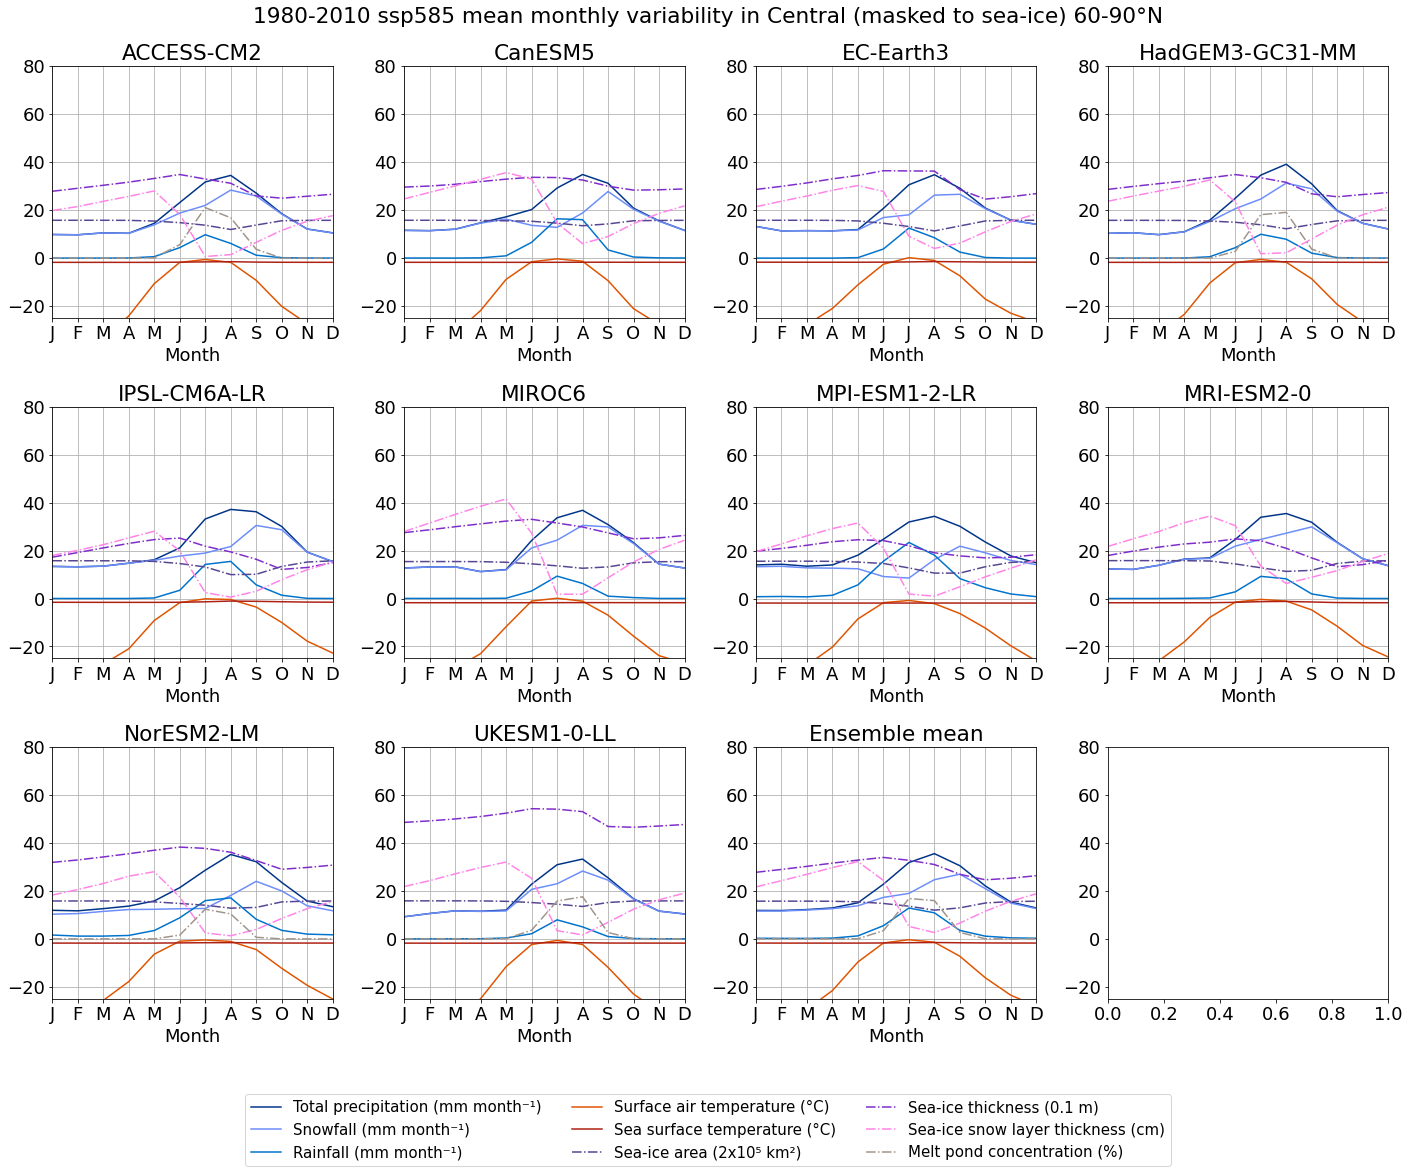

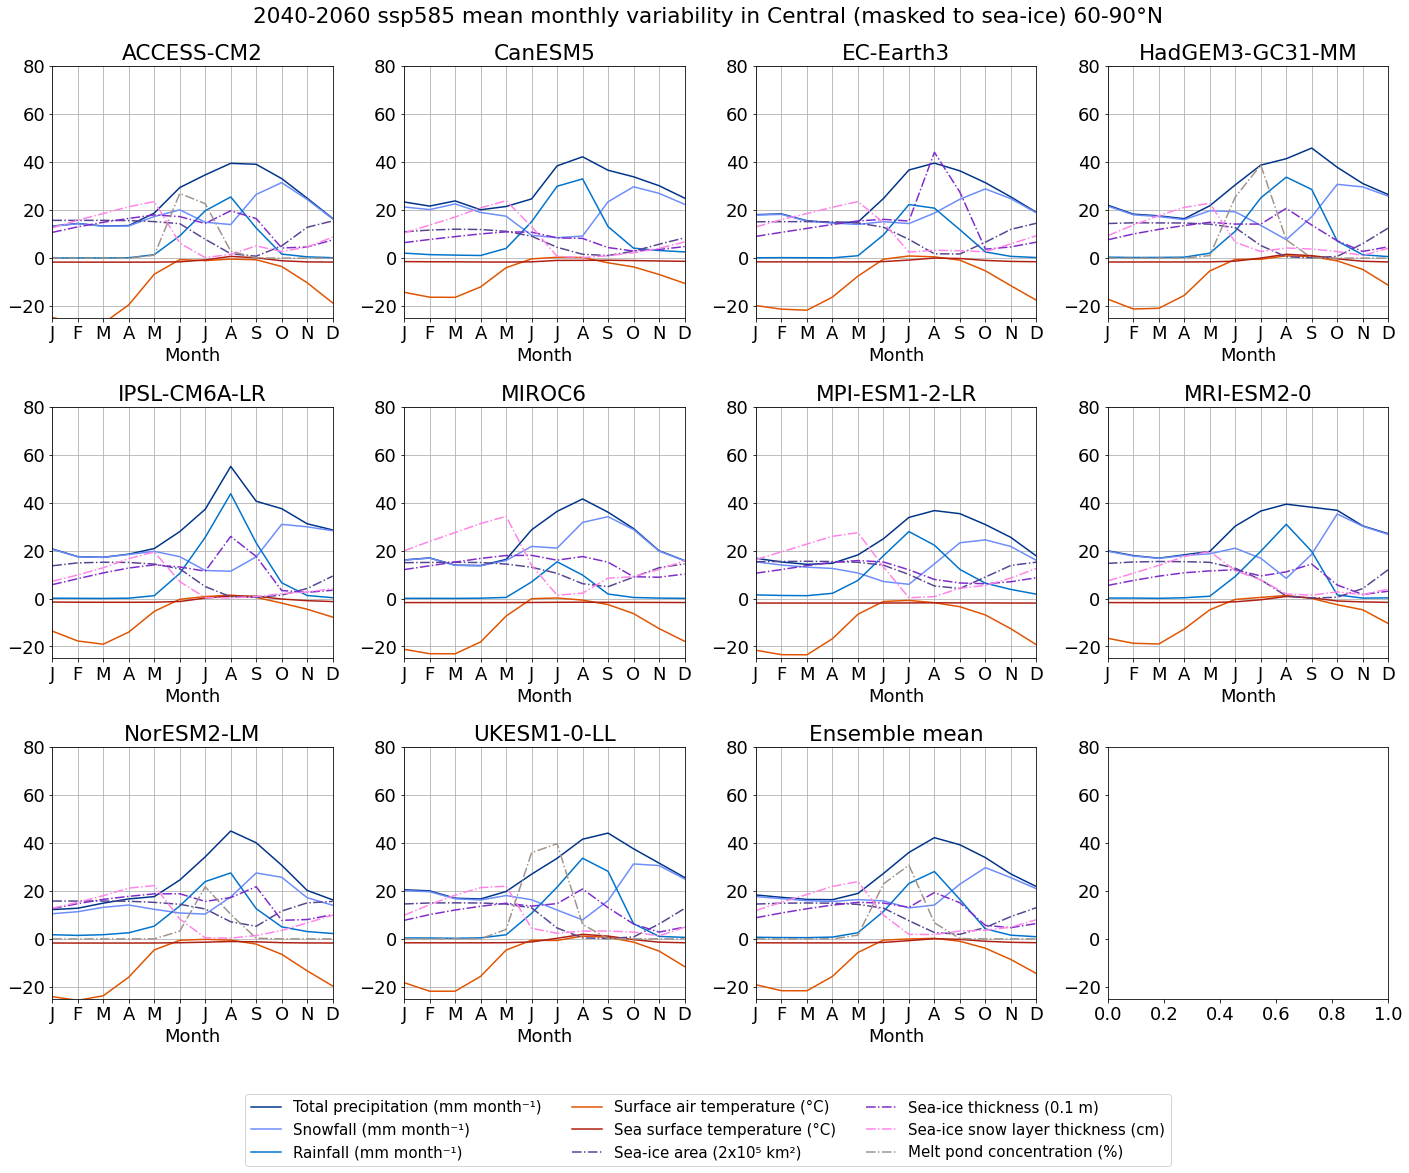

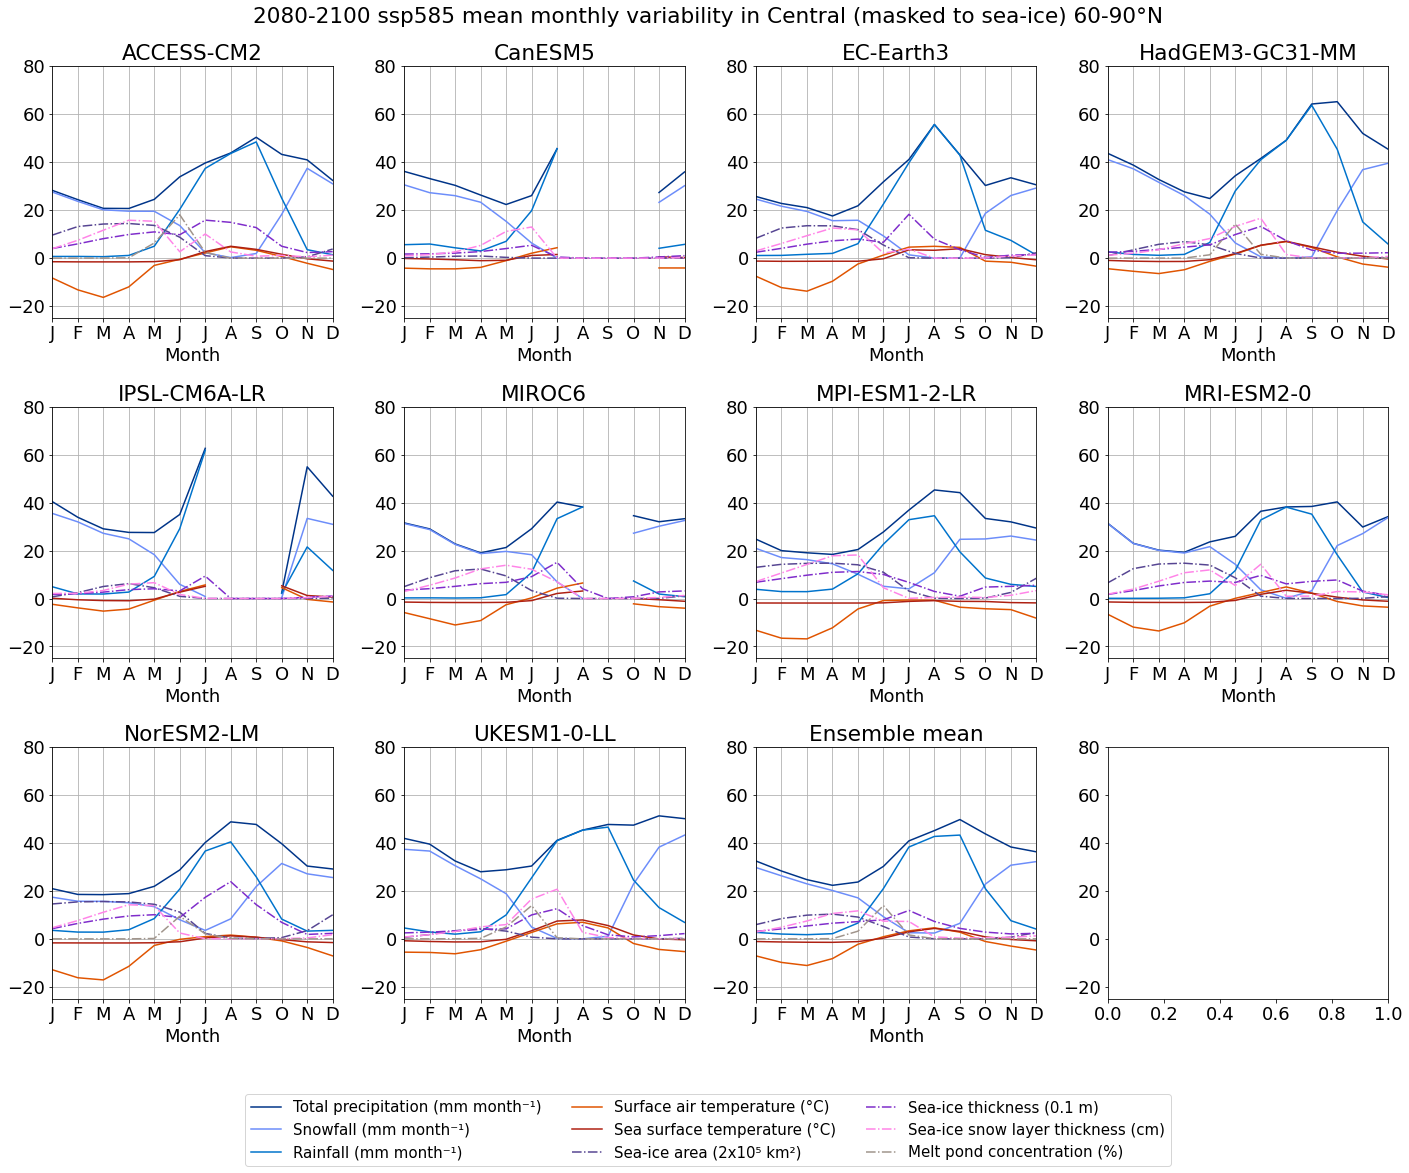

In [6]:
for s in time_slices:
    s_label = s['label']
    arr = []

    for model in ensemble_pr_time_series:      
        slice_pr = ensemble_pr_time_series.sel(**s['slice']).groupby('time.month').mean('time')
        slice_pr[model].attrs['label'] = 'Total precipitation (mm month⁻¹)'
        slice_pr[model].attrs['color'] = '#003488'

        slice_prsn = ensemble_prsn_time_series.sel(**s['slice']).groupby('time.month').mean('time')
        slice_prsn[model].attrs['label'] = 'Snowfall (mm month⁻¹)'
        slice_prsn[model].attrs['color'] = '#6c8dfa'

        slice_prra = ensemble_prra_time_series.sel(**s['slice']).groupby('time.month').mean('time')
        slice_prra[model].attrs['label'] = 'Rainfall (mm month⁻¹)'
        slice_prra[model].attrs['color'] = '#0073cc'

        slice_tas = ensemble_tas_time_series.sel(**s['slice']).groupby('time.month').mean('time')
        slice_tas[model].attrs['label'] = 'Surface air temperature (°C)'
        slice_tas[model].attrs['color'] = '#e05400'
        
        slice_tos = ensemble_tos_time_series.sel(**s['slice']).groupby('time.month').mean('time')
        slice_tos[model].attrs['label'] = 'Sea surface temperature (°C)'
        slice_tos[model].attrs['color'] = '#ae2012'

        slice_siconc = ensemble_siconc_time_series.sel(**s['slice']).groupby('time.month').mean('time')
        slice_siconc[model].attrs['label'] = 'Sea-ice area (2x10⁵ km²)'
        slice_siconc[model].attrs['color'] = '#564592'

        slice_sithick = ensemble_sithick_time_series.sel(**s['slice']).groupby('time.month').mean('time')
        slice_sithick[model].attrs['label'] = 'Sea-ice thickness (0.1 m)'
        slice_sithick[model].attrs['color'] = '#7f2ccb'

        slice_sisnthick = ensemble_sisnthick_time_series.sel(**s['slice']).groupby('time.month').mean('time')
        slice_sisnthick[model].attrs['label'] = 'Sea-ice snow layer thickness (cm)'
        slice_sisnthick[model].attrs['color'] = '#ff84e8'
        
        slice_simp = ensemble_simp_time_series.sel(**s['slice']).groupby('time.month').mean('time')
        if model in slice_simp:
            slice_simp[model].attrs['label'] = 'Melt pond concentration (%)'
            slice_simp[model].attrs['color'] = '#A0948B'
        
        model_variables = [
            slice_pr[model],
            slice_prsn[model],
            slice_prra[model],
            slice_tas[model],
            slice_tos[model],
            slice_siconc[model],
            slice_sithick[model],
            slice_sisnthick[model]
        ]
        if model in slice_simp:
            model_variables.append(slice_simp[model])

        arr.append(model_variables)

    libs.plot.monthly_variability_model(
        arr,
        cols=3,
        legend_below=True,
        shape=(3, 4),
        title=f'{s_label} {experiment} mean monthly variability in Central (masked to sea-ice) 60-90°N',
        ylabel=time_series_y_label,
        yrange=(-25, 80), #time_series_y_range_monthly
    )

### Per model anomaly

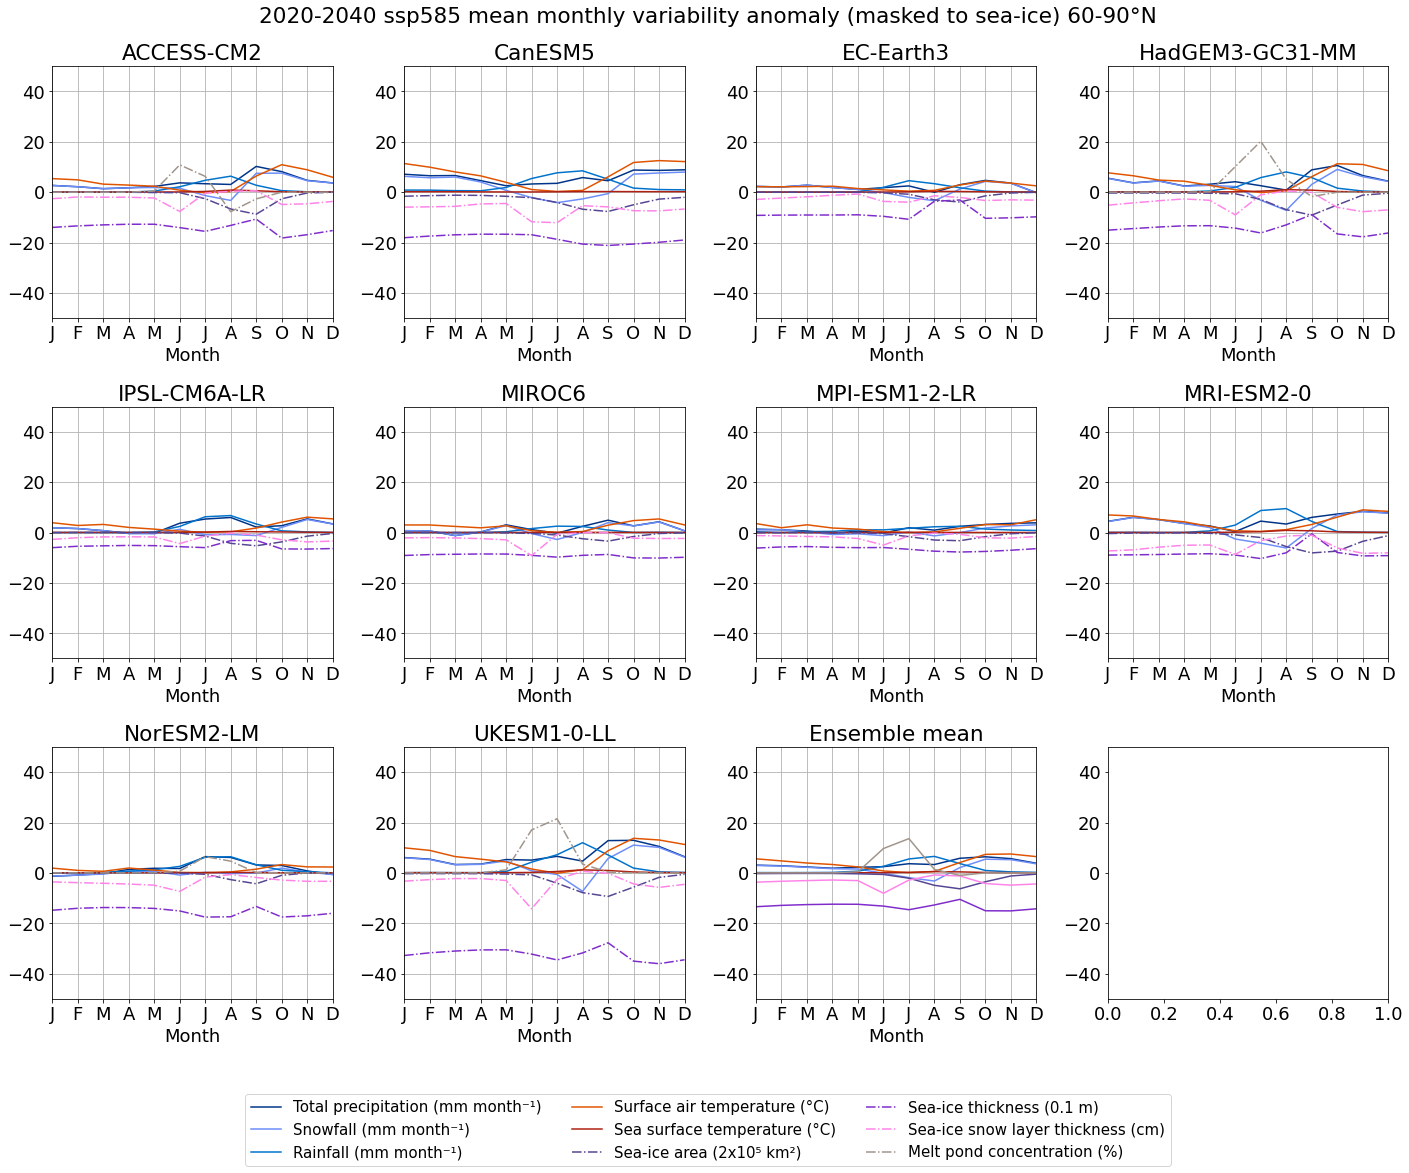

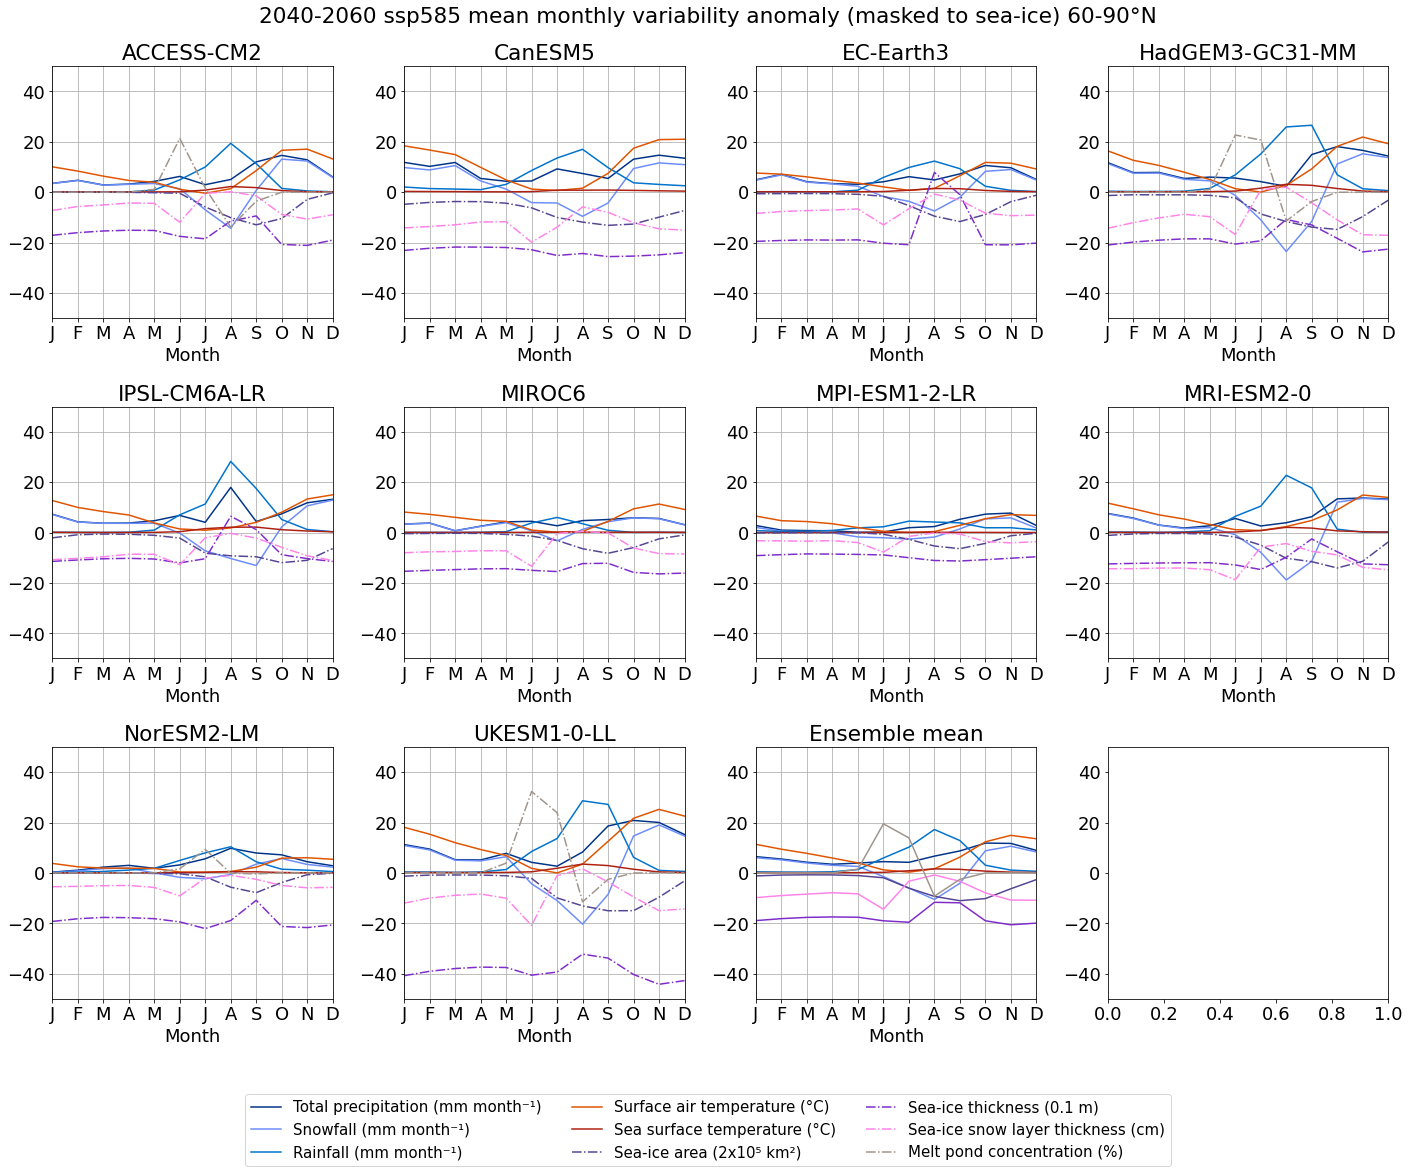

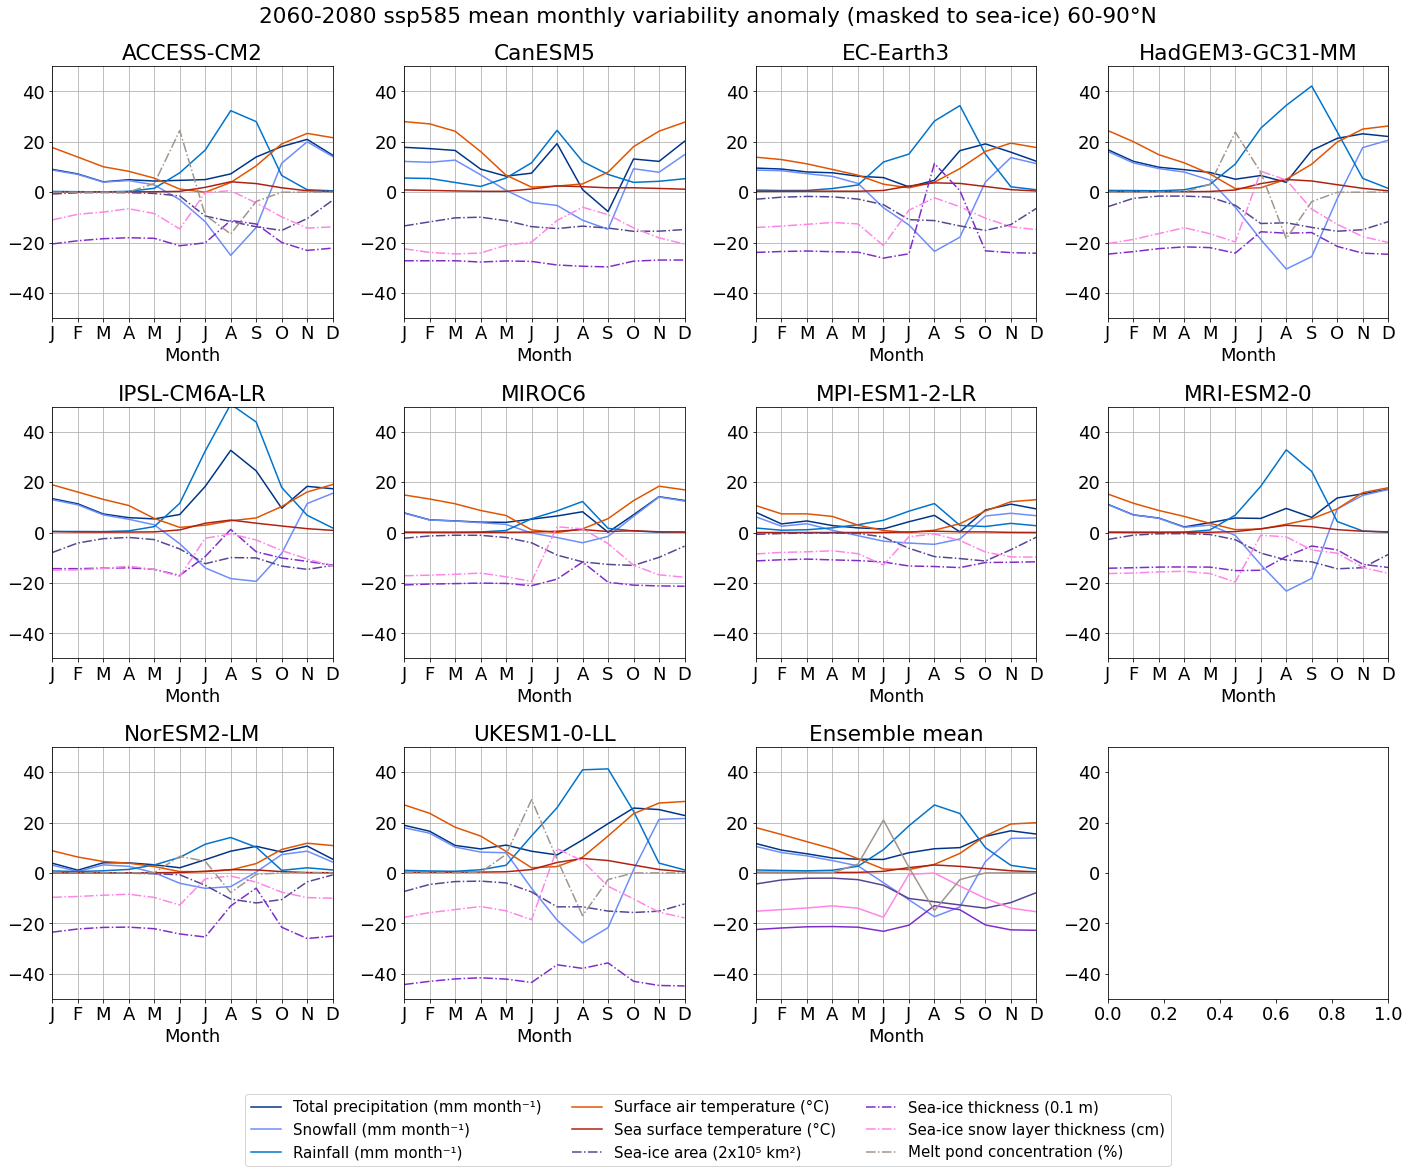

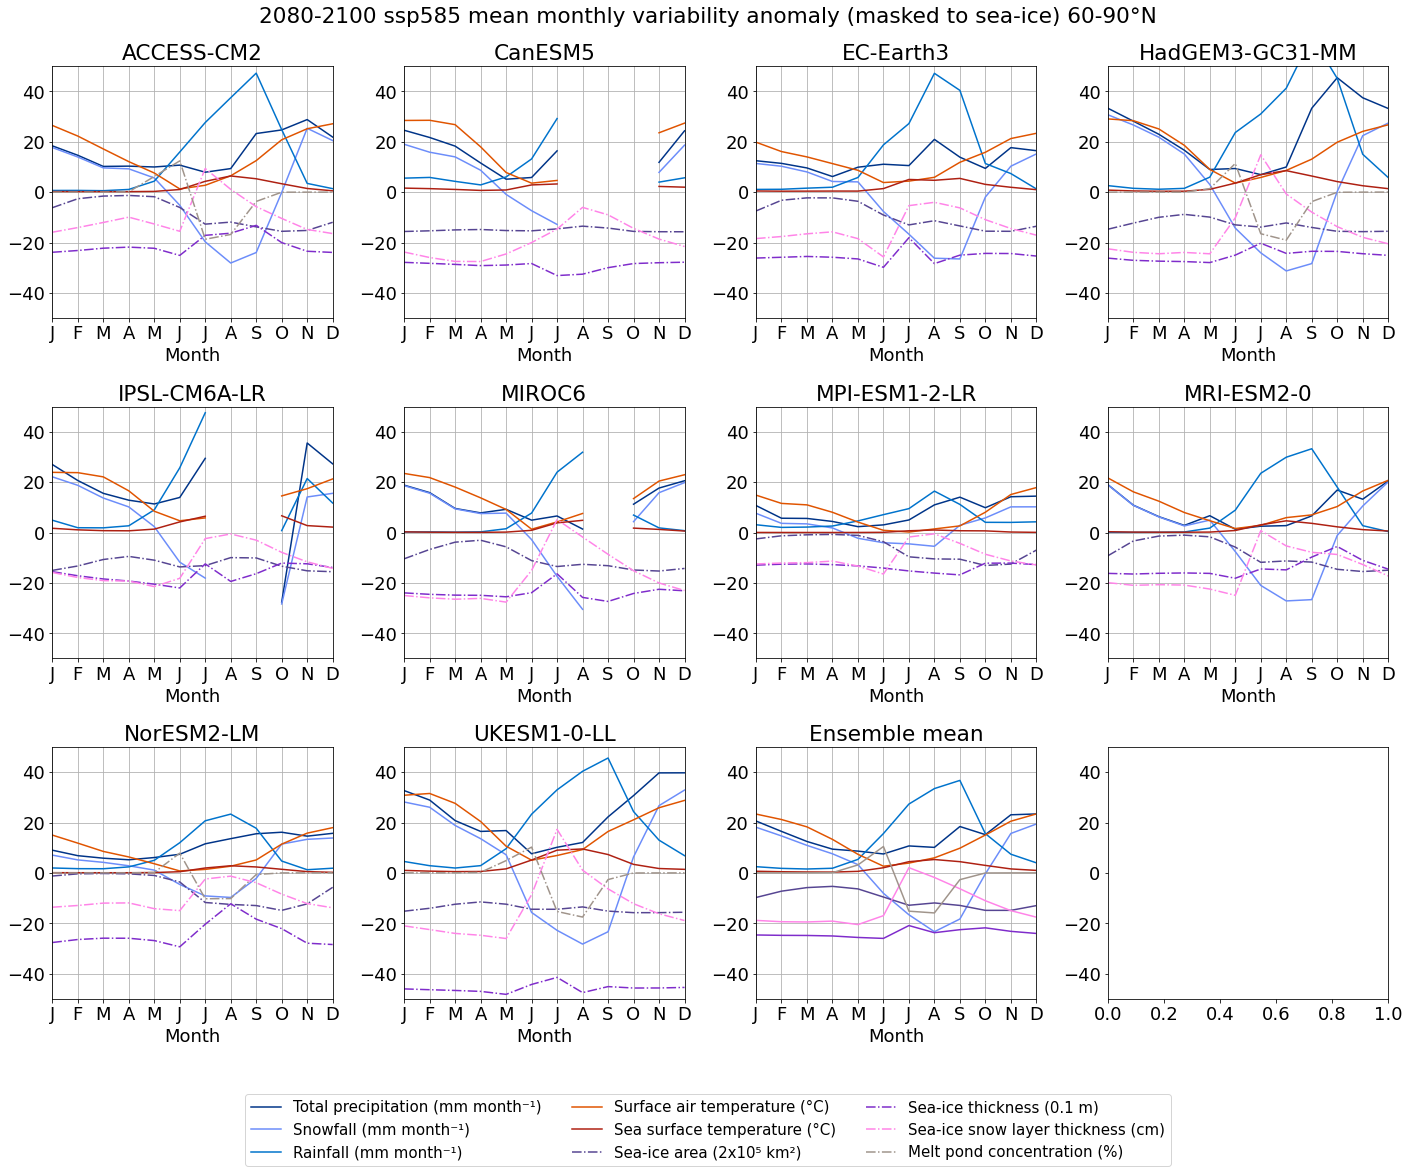

In [7]:
import matplotlib.pyplot as plt

def preprocess_data(data, s):
    slice_data = libs.analysis.climatology_monthly(data, '1980-01-01', '2011-01-01', relative=False)
    slice_data = slice_data.sel(**s['slice']).groupby('time.month').mean('time', skipna=True)
    slice_data = libs.ensemble.calc_variable_mean(slice_data)
        
    return slice_data


time_slices_custom = [
    { 'slice': { 'time': slice('2020-01-01', '2041-01-01') }, 'label': '2020-2040' },
    { 'slice': { 'time': slice('2040-01-01', '2061-01-01') }, 'label': '2040-2060' },
    { 'slice': { 'time': slice('2060-01-01', '2081-01-01') }, 'label': '2060-2080' },
    { 'slice': { 'time': slice('2080-01-01', '2101-01-01') }, 'label': '2080-2100' },
]
for s in time_slices_custom:
    s_label = s['label']
    arr = []

    for model in ensemble_pr_time_series:      
        slice_pr = preprocess_data(ensemble_pr_time_series, s)
        slice_pr[model].attrs['label'] = 'Total precipitation (mm month⁻¹)'
        slice_pr[model].attrs['color'] = '#003488'

        slice_prsn = preprocess_data(ensemble_prsn_time_series, s)
        slice_prsn[model].attrs['label'] = 'Snowfall (mm month⁻¹)'
        slice_prsn[model].attrs['color'] = '#6c8dfa'

        slice_prra = preprocess_data(ensemble_prra_time_series, s)
        slice_prra[model].attrs['label'] = 'Rainfall (mm month⁻¹)'
        slice_prra[model].attrs['color'] = '#0073cc'

        slice_tas = preprocess_data(ensemble_tas_time_series, s)
        slice_tas[model].attrs['label'] = 'Surface air temperature (°C)'
        slice_tas[model].attrs['color'] = '#e05400'
        
        slice_tos = preprocess_data(ensemble_tos_time_series, s)
        slice_tos[model].attrs['label'] = 'Sea surface temperature (°C)'
        slice_tos[model].attrs['color'] = '#ae2012'

        slice_siconc = preprocess_data(ensemble_siconc_time_series, s)
        slice_siconc[model].attrs['label'] = 'Sea-ice area (2x10⁵ km²)'
        slice_siconc[model].attrs['color'] = '#564592'

        slice_sithick = preprocess_data(ensemble_sithick_time_series, s)
        slice_sithick[model].attrs['label'] = 'Sea-ice thickness (0.1 m)'
        slice_sithick[model].attrs['color'] = '#7f2ccb'

        slice_sisnthick = preprocess_data(ensemble_sisnthick_time_series, s)
        slice_sisnthick[model].attrs['label'] = 'Sea-ice snow layer thickness (cm)'
        slice_sisnthick[model].attrs['color'] = '#ff84e8'
        
        slice_simp = preprocess_data(ensemble_simp_time_series, s)
        if model in slice_simp:
            slice_simp[model].attrs['label'] = 'Melt pond concentration (%)'
            slice_simp[model].attrs['color'] = '#A0948B'
        
        model_variables = [
            slice_pr[model],
            slice_prsn[model],
            slice_prra[model],
            slice_tas[model],
            slice_tos[model],
            slice_siconc[model],
            slice_sithick[model],
            slice_sisnthick[model]
        ]
        if model in slice_simp:
            model_variables.append(slice_simp[model])

        arr.append(model_variables)

    libs.plot.monthly_variability_model(
        arr,
        cols=3,
        legend_below=True,
        shape=(3, 4),
        title=f'{s_label} {experiment} mean monthly variability anomaly (masked to sea-ice) 60-90°N',
        ylabel=time_series_y_label,
        yrange=(-50, 50),
    )